# CryptoCurrency : DogeCoin Prediction in USD (Beginners Level)

Here is the data of the Price of the Famous Cryptocurrency i.e Dogecoin from 2014 to 2021. Here we do the analysis of the price hike in the recent scenario.

Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
ls

data/                                  dogecoin-prediction-analysis-98.ipynb


In [7]:
df = pd.read_csv('data/DOGE-USD.csv')

In [8]:
df.head(11)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0
5,2014-09-22,0.000288,0.000301,0.000285,0.000298,0.000298,620222.0
6,2014-09-23,0.000298,0.000318,0.000295,0.000313,0.000313,739197.0
7,2014-09-24,0.000314,0.000353,0.000310,0.000348,0.000348,1277840.0
8,2014-09-25,0.000347,0.000383,0.000332,0.000375,0.000375,2393610.0
9,2014-09-26,0.000374,0.000467,0.000373,0.000451,0.000451,4722610.0


In [9]:
df1 = df.tail(135)
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2355,2021-02-27,0.050500,0.051920,0.049297,0.050083,0.050083,1.286230e+09
2356,2021-02-28,0.050097,0.050134,0.045088,0.048052,0.048052,1.408101e+09
2357,2021-03-01,0.048070,0.051479,0.048029,0.050599,0.050599,1.494427e+09
2358,2021-03-02,0.050596,0.052382,0.049299,0.050262,0.050262,1.346282e+09
2359,2021-03-03,0.050278,0.052126,0.050078,0.050592,0.050592,1.093877e+09


Here we see the data ranges from 2014 to 2021.

Let Check the null values in the dataset

In [10]:
df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [11]:
#list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
 
#print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Open 0.0016  % missing values
High 0.0016  % missing values
Low 0.0016  % missing values
Close 0.0016  % missing values
Adj Close 0.0016  % missing values
Volume 0.0016  % missing values


In [12]:
df.shape

(2490, 7)

In [13]:
df.groupby('Date')['Volume'].median().shape

(2490,)

## Lets Visualize the dataset with the Timespan

Text(0.5, 1.0, 'Date vs Volume')

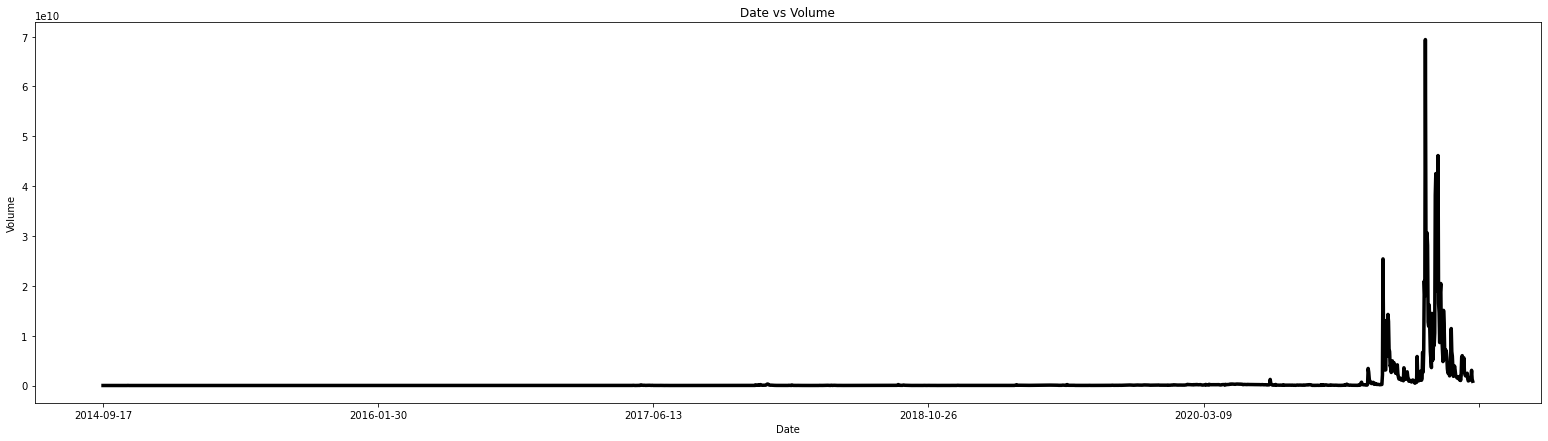

In [14]:
plt.figure(figsize=(27,7))
df.groupby('Date')['Volume'].median().plot(linewidth = 3.5, color = 'k')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume")

### Lets Visualize the dataset with the Timespan of year 2021

Text(0.5, 1.0, 'Date vs Volume of 2021')

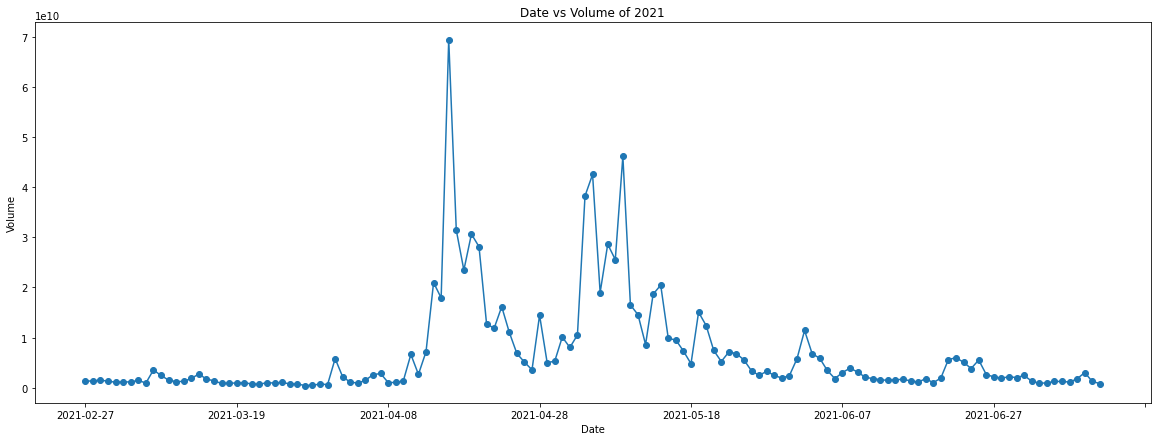

In [15]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Volume'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume of 2021")

Text(0.5, 1.0, 'Date vs Open of 2021')

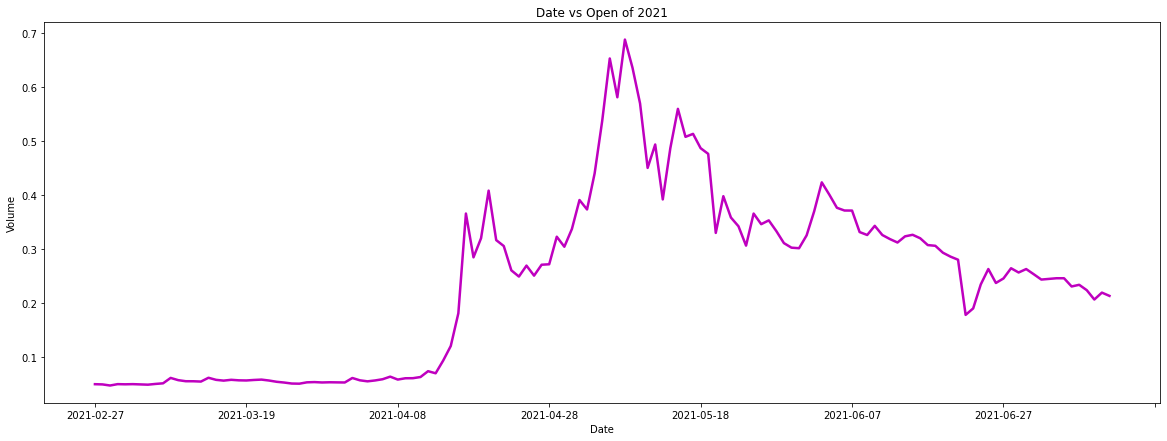

In [16]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Open'].mean().plot(linewidth = 2.5, color = 'm')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Open of 2021")

Text(0.5, 1.0, 'Date vs High of 2021')

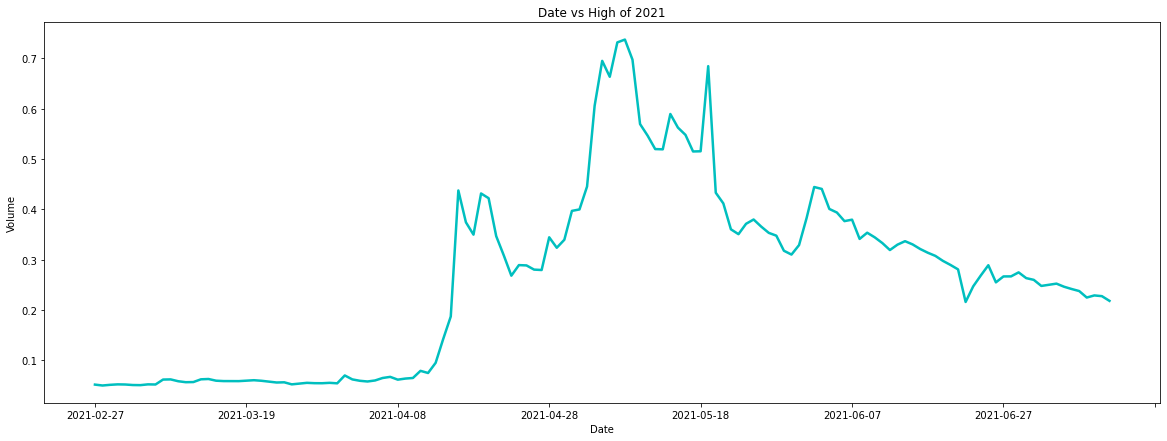

In [17]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['High'].mean().plot(linewidth = 2.5, color = 'c')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs High of 2021")

Text(0.5, 1.0, 'Date vs Low of 2021')

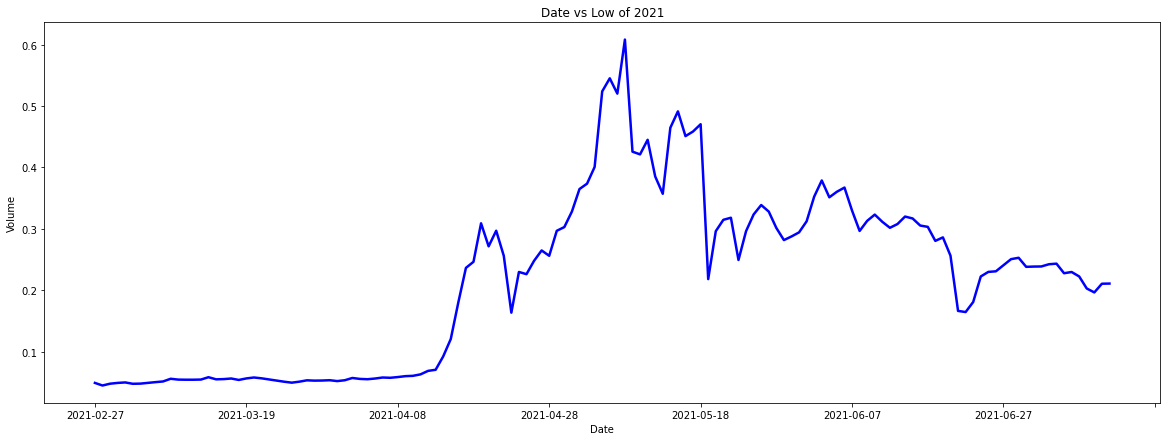

In [18]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Low'].mean().plot(linewidth = 2.5, color = 'b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Low of 2021")

Text(0.5, 1.0, 'Date vs Close of 2021')

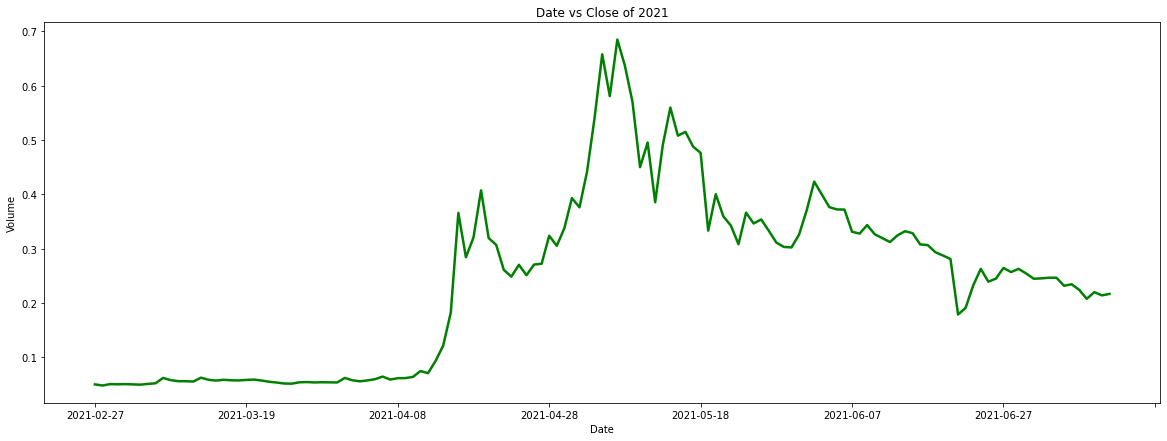

In [19]:
plt.figure(figsize=(20,7))
df1.groupby('Date')['Close'].mean().plot(linewidth = 2.5, color = 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

Text(0.5, 1.0, 'Date vs Adj Close of 2021')

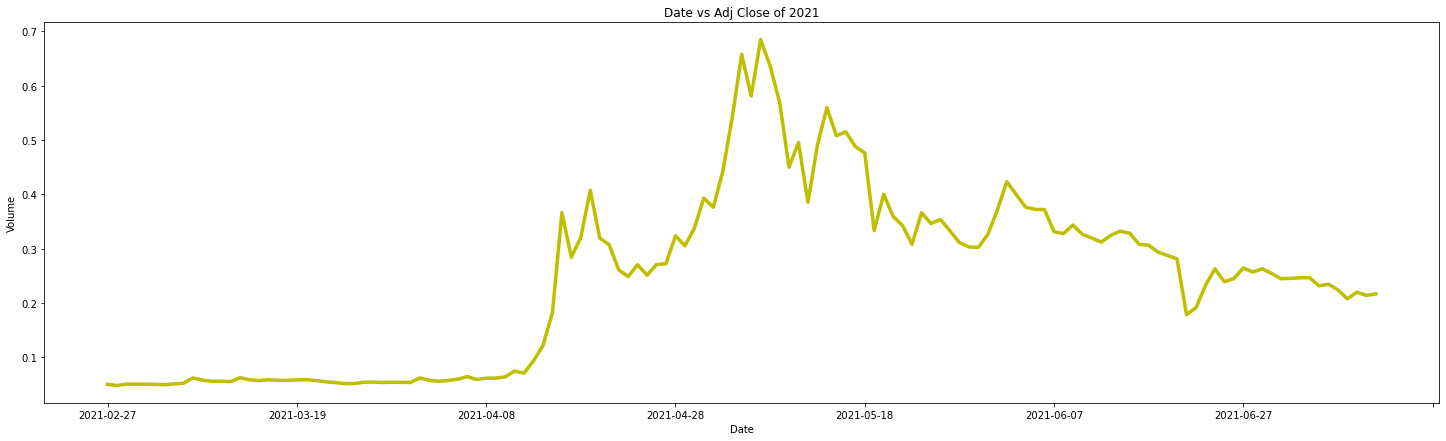

In [20]:
plt.figure(figsize=(25,7))
df1.groupby('Date')['Adj Close'].mean().plot(linewidth = 3.5, color = 'y')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Adj Close of 2021")

#### Lets Check the correlation between features of the dataset. How much they close to eachother.

In [21]:
new_df =pd.read_csv('data/DOGE-USD.csv', usecols = ['Open','High','Low','Close','Volume']).fillna(method='ffill')

<AxesSubplot:>

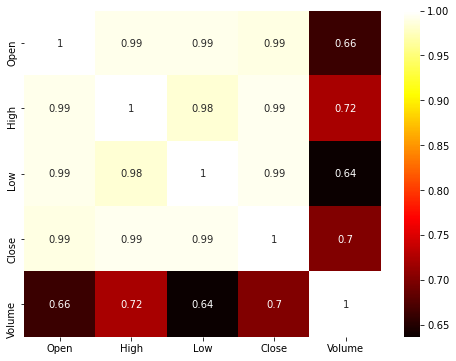

In [22]:
plt.figure(figsize = (8,6))
sns.heatmap(new_df.corr() , cmap = 'hot', annot = True)

From the above figure we can see that all the features are closely related to each other.

## Split Data 

In [23]:
X = new_df.drop('High', axis=1)
y = new_df['High']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (2490, 4)
Shape of y =  (2490,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1743, 4)
Shape of y_train =  (1743,)
Shape of X_test =  (747, 4)
Shape of y_test =  (747,)


### Lets Train the Model.

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
regressor = RandomForestRegressor(n_estimators=500, criterion='mse',random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [27]:
X_train

,Open,Low,Close,Volume
115,0.000171,0.000161,0.000162,351577.0
2170,0.003301,0.003251,0.003303,80416711.0
744,0.000229,0.000229,0.000235,147126.0
1544,0.002113,0.002089,0.002102,16961970.0
2323,0.008382,0.008022,0.008255,161173749.0
...,...,...,...,...
1638,0.002015,0.002005,0.002025,17366462.0
1095,0.000848,0.000774,0.000867,13242000.0
1130,0.001048,0.000959,0.001007,3157240.0
1294,0.002794,0.002780,0.002980,6618080.0


In [28]:
y_train

115     0.000173
2170    0.003345
744     0.000235
1544    0.002144
2323    0.008456
          ...   
1638    0.002053
1095    0.000921
1130    0.001068
1294    0.002993
860     0.000209
Name: High, Length: 1743, dtype: float64

Prediction Score

In [29]:
regressor.score(X_test, y_test)

0.9985525327905526

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
ds = pd.DataFrame()
ds['High']=y_test

In [32]:
ds['Prediction']=y_pred
ds.head(11)

,High,Prediction
1057,0.001974,0.002013
478,0.000158,0.000159
976,0.001921,0.001940
422,0.000133,0.000132
1399,0.003261,0.003253
1447,0.005550,0.005397
2329,0.043250,0.043955
1937,0.002564,0.002484
2064,0.002513,0.002495
2476,0.266982,0.278111


<AxesSubplot:>

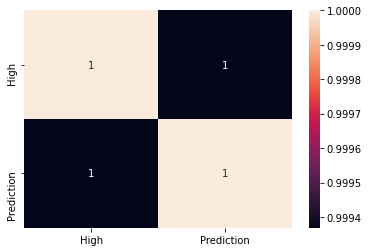

In [33]:
sns.heatmap(ds.corr(), annot = True)

Here we can see that  from the correlation Matrix that our Actual Data Set and the Predicted data set is higly correlated.